In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [2]:
@jit(cache=True)
def solvepoisson(b,nrep):
    # b = boundary conditions, = NaN on interior of region
    # nrep = number of iterations
    # returns potential no the same grid as b
    V = np.copy(b)
    for i in range(len(V.flat)):
        if (np.isnan(b.flat[i])):
            V.flat[i] = 0.0
    Vnew = np.copy(V) # See comment in text
    Lx, Ly = b.shape[0], b.shape[1]
    for n in range(nrep):
        for ix in range(Lx):
            for iy in range(Ly):
                if (np.isnan(b[ix,iy])):
                    Vnew[ix,iy] = (V[ix+1,iy]+V[ix-1,iy]+\
                                   V[ix,iy+1]+V[ix,iy-1])/4
        V, Vnew = Vnew, V # Swap pointers to arrays
    return V

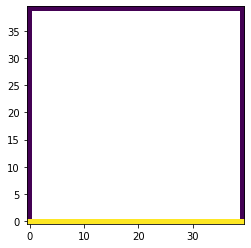

In [7]:
N = 40
a = 1.0 # meters
x_A, x_B, y_A, y_B = -a,a,-a,a
x = np.linspace(x_A,x_B,N)
y = np.linspace(y_A,y_B,N)
# Set up matrix of b-values
b = np.zeros((N,N),float)
b[:] = float('nan')
b[0,:] = 0.0
b[N-1,:] = 0.0
b[:,0] = 1.0
b[:,N-1] = 0.0
# Visualize results
plt.imshow(b.T,origin='lower')

In [8]:
nrep = 2000
V = solvepoisson(b,nrep)

(-1.0, 1.0, -1.0, 1.0)

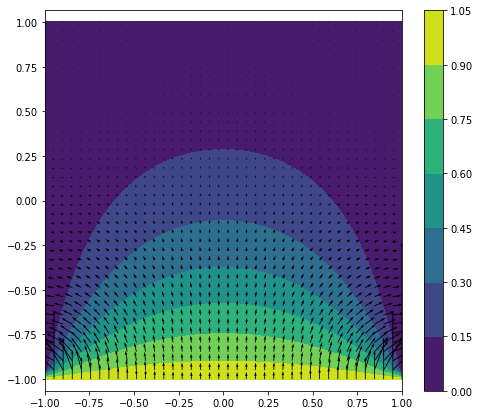

In [25]:
rx,ry = np.meshgrid(x,y,indexing="ij")
plt.figure(figsize=(8,7))
plt.contourf(rx,ry,V,cmap="viridis") # viridis, plasma, inferno, magma
plt.colorbar()
Ex,Ey = np.gradient(-V)
plt.quiver(rx,ry,Ex,Ey)
plt.axis('equal')

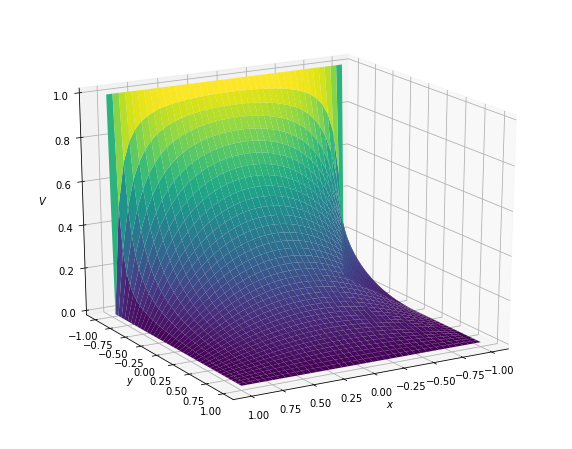

In [28]:
# Plot surface instead
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib import cm

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(rx,ry,V,cmap=cm.viridis) # coolwarm

ax.view_init(20, 60)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$V$')
plt.show()